# Generate correction profiles for denoised

by Pu Zheng

2019.06.18

In [1]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *

print(os.getpid())

33108


In [2]:
reload(ia.get_img_info)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)
reload(ia.alignment_tools)
reload(ia.correction_tools.illumination)

<module 'ImageAnalysis3.correction_tools.illumination' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\illumination.py'>

# Data folder

In [3]:
# master folder for this dataset:
master_folder = r'\\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap'
# correction folder
correction_folder=os.path.join(master_folder, 'Corrections_3color')
if not os.path.exists(correction_folder):
    print(f"creating folder: {correction_folder}")
    os.makedirs(correction_folder)

# Illumination_correction

In [4]:
#master_folder = r'\\10.245.74.116\Chromatin_NAS_4\20191218_CTP05-chr21_HCT116_6hauxin'
#correction_folder =os.path.join(master_folder, 'Corrections')
folders, fovs = get_img_info.get_folders(master_folder, 'H')
#folders = [_fd for _fd in folders if ('Cy' in _fd and '3color' in _fd)]
print(folders)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 4
- Number of field of views: 81
['\\\\10.245.74.158\\Chromatin_NAS_6\\20200803-IMR90_SI16-5kb_colorswap\\H0R0', '\\\\10.245.74.158\\Chromatin_NAS_6\\20200803-IMR90_SI16-5kb_colorswap\\H1R1', '\\\\10.245.74.158\\Chromatin_NAS_6\\20200803-IMR90_SI16-5kb_colorswap\\H2R2', '\\\\10.245.74.158\\Chromatin_NAS_6\\20200803-IMR90_SI16-5kb_colorswap\\H3R3']


In [5]:
# shared parameters
single_im_size = np.array([30,2048,2048])
all_colors = ['750','647','561','488','405']
# image and threads
num_images = 60
num_threads = 30

# Illumination correction

-- directly load:[] illumination profiles for files
-- start calculating ['750', '647', '561', '488', '405'] illumination profiles
-- 60 among 81 dax files will be loaded in data_folder: \\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\H0R0
++ start multi-processing illumination profile calculateion with 30 threads for 60 images in 2121.02s.
-- saving updated profiles
--- saving 750 profile into file: \\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\Corrections_3color\illumination_correction_750_2048x2048.npy
--- saving 647 profile into file: \\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\Corrections_3color\illumination_correction_647_2048x2048.npy
--- saving 561 profile into file: \\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\Corrections_3color\illumination_correction_561_2048x2048.npy
--- saving 488 profile into file: \\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\Corrections_3color\illuminati

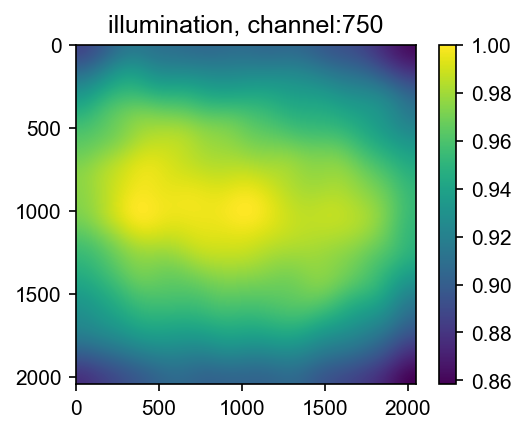

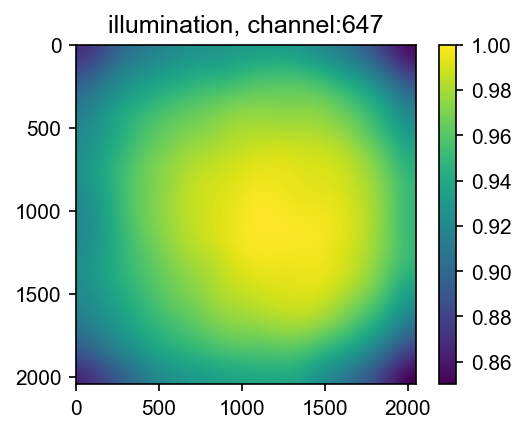

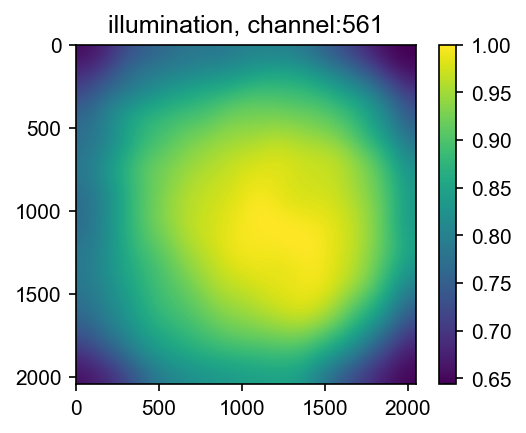

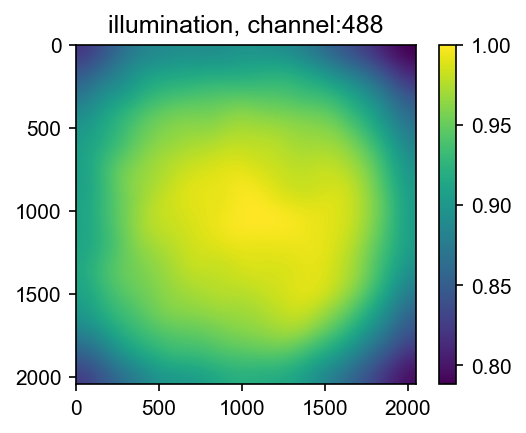

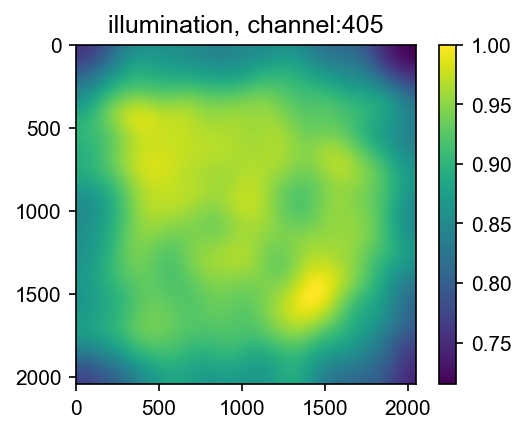

-- finish generating illumination profiles, time:2161.25s


In [6]:
%matplotlib inline
reload(ia.correction_tools.illumination)

dapi_folder = folders[0]
illumination_pfs = correction_tools.illumination.Generate_illumination_correction(
                        dapi_folder, 
                        all_colors,
                        all_channels=all_colors,
                        num_threads=num_threads,
                        num_images=num_images,
                        single_im_size=single_im_size,
                        correction_folder=correction_folder,
                        gaussian_filter_size=60,
                        save=True, save_folder=correction_folder,
                        overwrite=True,
                        )

# Chromatic Abbrevation

## chromatic for 750

In [8]:
cc_folder = folders[1]
ref_folder = folders[2]
print(cc_folder, ref_folder)

\\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\H1R1 \\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\H2R2


-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 750 illumination_correction_750_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
++ generating chromatic info for 60 images in 30 threads in 2260.096s.
++ fitting polynomial orders: [1 1 1]
-- constants: [ 2.08519118e-01  1.21962831e-02 -1.33656767e-05  4.44860795e-05] with rsquare=0.12980749820198767
-- constants: [-2.41949290e-02  2.72211753e-03 -1.84747067e-03 -1.05754583e-06] with rsquare=0.9713836646164216
-- constants: [-1.25982322e-01  4.59292678e-03 -1.16347213e-05 -1.85645405e-03] with rsquare=0.9712070102724851
++ saving new profiles into folder: \\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\Corrections_3color


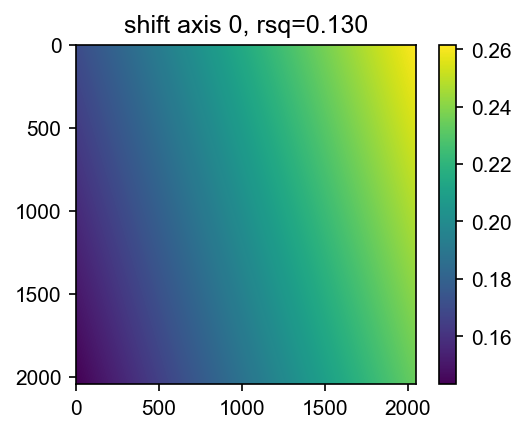

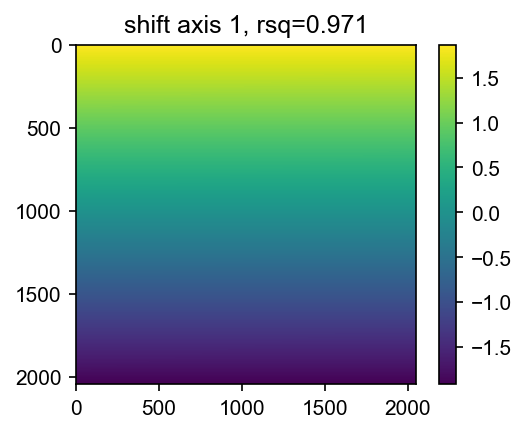

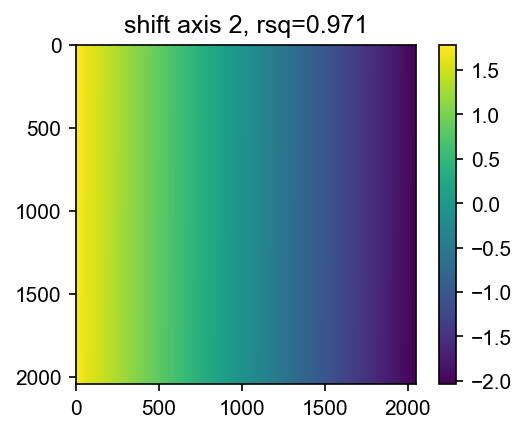

In [9]:
reload(correction_tools.chromatic)
chromatic_pfs, chromatic_consts = correction_tools.chromatic.Generate_chromatic_abbrevation(
                                    cc_folder, ref_folder, '750',
                                    num_images=num_images, num_threads=num_threads, 
                                    fitting_orders=[1,1,1],
                                    correction_args={'correction_folder':correction_folder,
                                                     'single_im_size': single_im_size,
                                                     'all_channels': all_colors,
                                                     'corr_channels': ['750', '647', '561'],
                                                     },
                                    save_folder=correction_folder,
                                    overwrite_profile=True,
                                    overwrite_temp=False, )

### check chromatic abbrevation, 750-647

In [10]:
test_fov_id = 5
ref_filename = os.path.join(ref_folder, fovs[test_fov_id])
cc_filename = os.path.join(cc_folder, fovs[test_fov_id])

# reference image
ref_ims, = ia.io_tools.load.correct_fov_image(ref_filename, 
    [647, 488], 
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=True,
    illumination_corr=True,
    chromatic_corr=False,
    bleed_corr=False, 
    correction_folder=correction_folder)

# target image, not warpping
raw_ims, corr_funcs, drift = ia.io_tools.load.correct_fov_image(cc_filename, 
    [750], 
    calculate_drift=True,
    ref_filename=ref_ims[-1],
    single_im_size=single_im_size,
    all_channels=all_colors,
    corr_channels=['750', '647'],
    warp_image=False,
    illumination_corr=True,
    chromatic_corr=True,
    bleed_corr=False, 
    correction_folder=correction_folder,
    return_drift=True)

# target image, warppring
corr_ims, = ia.io_tools.load.correct_fov_image(cc_filename, 
     [750], 
     calculate_drift=False,
     drift=drift,
     ref_filename=ref_ims[-1],
     single_im_size=single_im_size,
     all_channels=all_colors,
     corr_channels=['750', '647'],
     warp_image=True,
     illumination_corr=True,
     chromatic_corr=True, 
     bleed_corr=False, 
     correction_folder=correction_folder,
     return_drift=False)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\H2R2\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\H2R2\Conv_zscan_05.dax  in 17.915s
-- removing hot pixels for channels:['647', '488'] in 22.953s
-- illumination correction for channels: 647, 488, in 4.290s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 46.645s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\H1R1\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_30_2048_2048_const.pkl
	 64

<IPython.core.display.Javascript object>


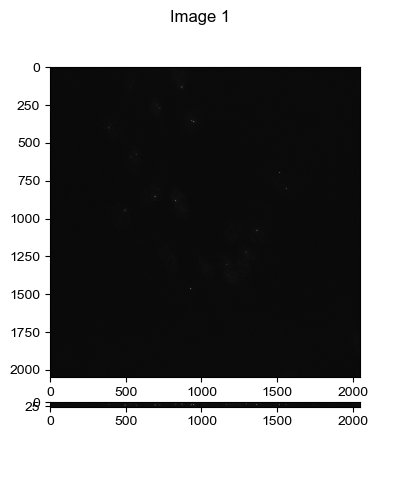

In [11]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2([raw_ims[0], corr_ims[0], ref_ims[0]])

In [12]:
corr_funcs[0]

<function ImageAnalysis3.correction_tools.chromatic.generate_chromatic_function.<locals>._shift_function(_coords, _drift=array([ 0.03,  0.2 , -2.11]), _consts=[array([ 2.08519118e-01,  1.21962831e-02, -1.33656767e-05,  4.44860795e-05]), array([-2.41949290e-02,  2.72211753e-03, -1.84747067e-03, -1.05754583e-06]), array([-1.25982322e-01,  4.59292678e-03, -1.16347213e-05, -1.85645405e-03])], _fitting_orders=array([1, 1, 1]), _ref_center=array([  15., 1024., 1024.]))>

In [13]:
reload(ia.io_tools.load)
reload(ia.correction_tools.chromatic)
from ImageAnalysis3.spot_tools.fitting import fit_fov_image
# fitting
int_th = 1

corr_spots = fit_fov_image(corr_ims[0], '750', th_seed=400, normalize_backgroud=True)
raw_spots = fit_fov_image(raw_ims[0], '750', th_seed=400, normalize_backgroud=True)
ref_spots = fit_fov_image(ref_ims[0], '647', th_seed=600, normalize_backgroud=True)
corr_spots = corr_spots[corr_spots[:,0] >= int_th]
raw_spots = raw_spots[raw_spots[:,0] >= int_th]
corr_raw_spots = corr_funcs[0](raw_spots)
ref_spots = ref_spots[ref_spots[:,0] >= int_th]

-- start fitting spots in channel:750, 21 seeded, normalize total background:175.00, 21 fitted in 44.368s.
-- start fitting spots in channel:750, 20 seeded, normalize total background:175.00, 20 fitted in 40.223s.
-- start fitting spots in channel:647, 47 seeded, normalize total background:385.00, 47 fitted in 42.098s.


<IPython.core.display.Javascript object>


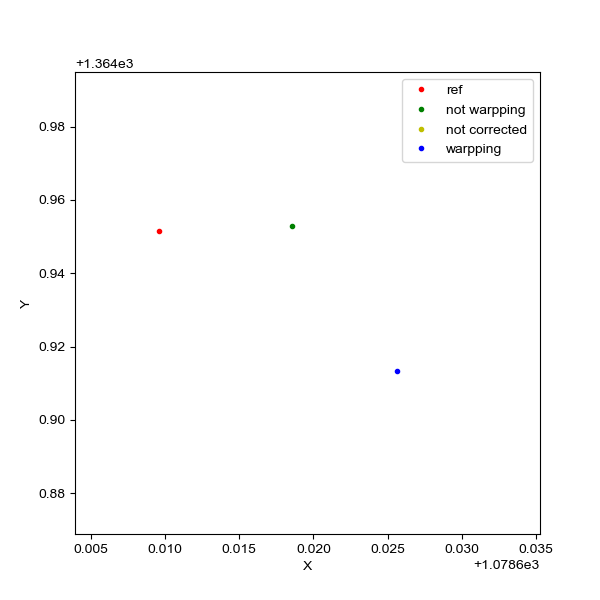

In [14]:
%matplotlib notebook
plt.figure(figsize=(6,6),dpi=100)
plt.plot(corr_spots[:,2], corr_spots[:,3], 'r.', label='ref')
plt.plot(corr_raw_spots[:,2], corr_raw_spots[:,3], 'g.', label='not warpping')
plt.plot(raw_spots[:,2], raw_spots[:,3], 'y.', label='not corrected')

plt.plot(ref_spots[:,2], ref_spots[:,3], 'b.', label='warpping')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
#plt.plot(ref_spots[:,2]+drift[1], ref_spots[:,3]+drift[2], 'b.')
plt.show()

In [ ]:
from ImageAnalysis3.spot_tools.matching import find_paired_centers, check_paired_centers

# matching
_new_drift, paired_ref_cts, paired_corr_cts = find_paired_centers(ref_spots[:,1:4], corr_raw_spots[:,1:4], drift=drift)
print(_new_drift)
_new_drift, paired_ref_cts, paired_corr_cts = check_paired_centers(paired_ref_cts, paired_corr_cts)
print(_new_drift)

## chromatic for 561

In [17]:
cc_folder = folders[3]
ref_folder = folders[2]
print(cc_folder, ref_folder)

\\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\H3R3 \\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\H2R2


In [18]:
all_colors

['750', '647', '561', '488', '405']

-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
++ generating chromatic info for 60 images in 30 threads in 2187.749s.
++ fitting polynomial orders: [1 1 1]
-- constants: [-6.99311033e-01 -1.35979982e-02  5.43813363e-06 -3.28594016e-05] with rsquare=0.1326951668471975
-- constants: [ 3.08153721e-02 -2.52253508e-03  1.58792268e-03 -5.90987940e-07] with rsquare=0.9613590216141685
-- constants: [2.07250186e-01 7.75089558e-04 9.08878416e-06 1.59180993e-03] with rsquare=0.9708599472885183
++ saving new profiles into folder: \\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\Corrections_3color


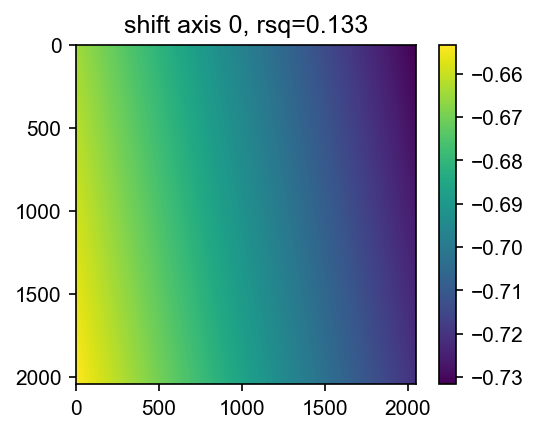

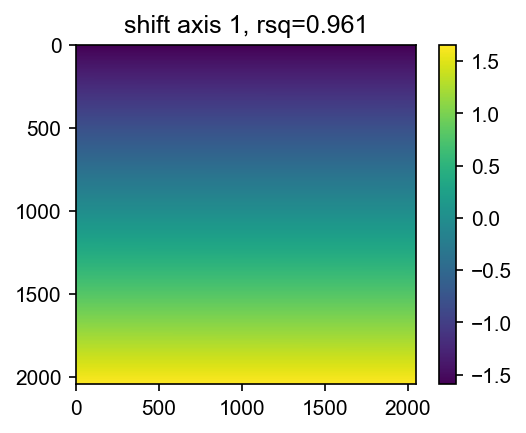

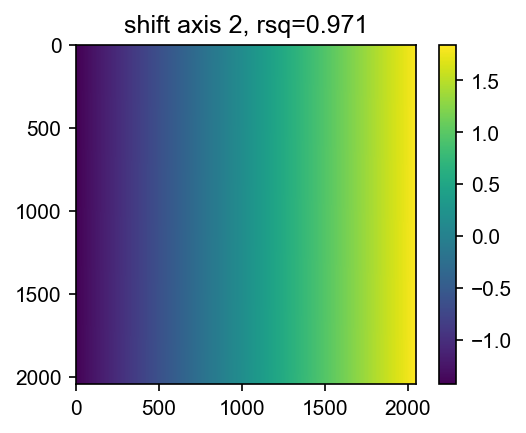

In [19]:
%matplotlib inline
reload(io_tools.load)
reload(correction_tools.chromatic)
chromatic_pfs, chromatic_consts = correction_tools.chromatic.Generate_chromatic_abbrevation(
                                    cc_folder, ref_folder, '561',
                                    num_images=num_images, num_threads=num_threads, 
                                    fitting_orders=[1,1,1],
                                    correction_args={'correction_folder':correction_folder,
                                                     'single_im_size': single_im_size,
                                                     'all_channels': all_colors,
                                                     'corr_channels': ['750', '647', '561'],
                                                     },
                                    save_folder=correction_folder,
                                    overwrite_profile=True)

### check chromatic abbrevation, 561-647

In [20]:
test_fov_id = 5
ref_filename = os.path.join(ref_folder, fovs[test_fov_id])
cc_filename = os.path.join(cc_folder, fovs[test_fov_id])

# reference image
ref_ims, = ia.io_tools.load.correct_fov_image(ref_filename, 
    [647, 488], 
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=True,
    illumination_corr=True,
    chromatic_corr=False,
    bleed_corr=False, 
    correction_folder=correction_folder)

# target image, not warpping
raw_ims, corr_funcs, drift = ia.io_tools.load.correct_fov_image(cc_filename, 
    [561], 
    calculate_drift=True,
    ref_filename=ref_ims[-1],
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=False,
    illumination_corr=True,
    chromatic_corr=True,
    bleed_corr=False, 
    correction_folder=correction_folder,
    return_drift=True)

# target image, warppring
corr_ims, = ia.io_tools.load.correct_fov_image(cc_filename, 
     [561], 
     calculate_drift=False,
     drift=drift,
     ref_filename=ref_ims[-1],
     single_im_size=single_im_size,
     all_channels=all_colors,
     warp_image=True,
     illumination_corr=True,
     chromatic_corr=True, 
     bleed_corr=False, 
     correction_folder=correction_folder,
     return_drift=False)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\H2R2\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\H2R2\Conv_zscan_05.dax  in 18.163s
-- removing hot pixels for channels:['647', '488'] in 23.055s
-- illumination correction for channels: 647, 488, in 5.045s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 47.987s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\H3R3\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_30_2048_2048_const.pkl
	 64

<IPython.core.display.Javascript object>


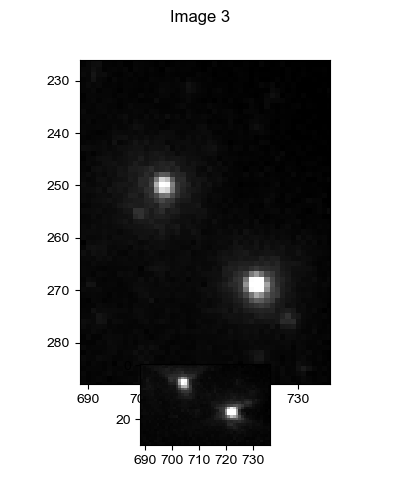

In [21]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([raw_ims[0], corr_ims[0], ref_ims[0]])

In [22]:
corr_funcs[0]

<function ImageAnalysis3.correction_tools.chromatic.generate_chromatic_function.<locals>._shift_function(_coords, _drift=array([-0.05, -0.34,  1.13]), _consts=[array([-6.99311033e-01, -1.35979982e-02,  5.43813363e-06, -3.28594016e-05]), array([ 3.08153721e-02, -2.52253508e-03,  1.58792268e-03, -5.90987940e-07]), array([2.07250186e-01, 7.75089558e-04, 9.08878416e-06, 1.59180993e-03])], _fitting_orders=array([1, 1, 1]), _ref_center=array([  15., 1024., 1024.]))>

In [23]:
reload(ia.io_tools.load)
reload(ia.correction_tools.chromatic)
from ImageAnalysis3.spot_tools.fitting import fit_fov_image
# fitting
int_th = 1

corr_spots = fit_fov_image(corr_ims[0], '561', th_seed=400, normalize_backgroud=True)
raw_spots = fit_fov_image(raw_ims[0], '561', th_seed=400, normalize_backgroud=True)
ref_spots = fit_fov_image(ref_ims[0], '647', th_seed=600, normalize_backgroud=True)
corr_spots = corr_spots[corr_spots[:,0] >= int_th]
raw_spots = raw_spots[raw_spots[:,0] >= int_th]
corr_raw_spots = corr_funcs[0](raw_spots)
ref_spots = ref_spots[ref_spots[:,0] >= int_th]

-- start fitting spots in channel:561, 42 seeded, 

E:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:199: RuntimeWarning: overflow encountered in exp
  return 2./(1+np.exp(t_))-1.


normalize total background:415.00, 42 fitted in 43.224s.
-- start fitting spots in channel:561, 43 seeded, normalize total background:415.00, 43 fitted in 42.887s.
-- start fitting spots in channel:647, 47 seeded, normalize total background:385.00, 47 fitted in 43.573s.


<IPython.core.display.Javascript object>


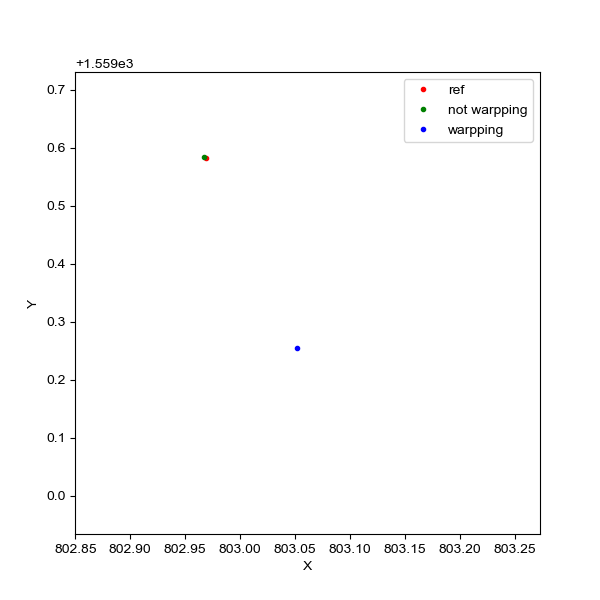

In [24]:
plt.figure(figsize=(6,6),dpi=100)
plt.plot(corr_spots[:,2], corr_spots[:,3], 'r.', label='ref')
plt.plot(corr_raw_spots[:,2], corr_raw_spots[:,3], 'g.', label='not warpping')
#plt.plot(raw_spots[:,2], raw_spots[:,3], 'y.', label='not warpping')

plt.plot(ref_spots[:,2], ref_spots[:,3], 'b.', label='warpping')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
#plt.plot(ref_spots[:,2]+drift[1], ref_spots[:,3]+drift[2], 'b.')
plt.show()

In [14]:
from ImageAnalysis3.spot_tools.matching import find_paired_centers, check_paired_centers

# matching
_new_drift, paired_ref_cts, paired_corr_cts = find_paired_centers(ref_spots[:,1:4], corr_spots[:,1:4], drift=drift)
print(_new_drift)
_new_drift, paired_ref_cts, paired_corr_cts = check_paired_centers(paired_ref_cts, paired_corr_cts+drift)
print(_new_drift)

[-0.22749987 -1.1536621   0.63221437]
[ 0.07508079  1.55682312 -0.9609845 ]


# bleedthrough correction

In [6]:
from ImageAnalysis3 import _image_size, _correction_folder, _allowed_colors
reload(correction_tools.bleedthrough)
from ImageAnalysis3.correction_tools.bleedthrough import find_bleedthrough_pairs, interploate_bleedthrough_correction_from_channel
import multiprocessing as mp
from ImageAnalysis3.correction_tools.chromatic import generate_polynomial_data


bleedthrough_channels=['750', '647', '561']

bleedthrough_correction_args = {
    'correction_folder': _correction_folder,
    'single_im_size':single_im_size,
    'all_channels':all_colors,
    'corr_channels':['750', '647', '561'],
    'bleed_corr':False,
    'illumination_corr':False,
    'chromatic_corr':False,
}

bleedthrough_fitting_args = {'max_num_seeds':200,
    'th_seed': 500,
    'use_dynamic_th':True,
}
reload(correction_tools.bleedthrough)

<module 'ImageAnalysis3.correction_tools.bleedthrough' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\bleedthrough.py'>

+ generating bleedthrough profiles.
++ generating bleedthrough info for 60 images in 30 threads in 3.123s.
- check 244 bleedthrough pairs.
- start iteration with outlier_sigma=2.00, keep_percentage=0.95
-- iter: 1, kept in this round: 0.930, total: 0.930


E:\Users\puzheng\Documents\ImageAnalysis3\correction_tools\bleedthrough.py:174: RuntimeWarning: divide by zero encountered in true_divide
  _nb_weights = 1 / np.linalg.norm(_nb_coords-_coord, axis=1)
E:\Users\puzheng\Documents\ImageAnalysis3\correction_tools\bleedthrough.py:175: RuntimeWarning: invalid value encountered in true_divide
  _nb_weights = _nb_weights / np.sum(_nb_weights)


-- iter: 2, kept in this round: 0.903, total: 0.840
-- iter: 3, kept in this round: 0.854, total: 0.717
-- iter: 4, kept in this round: 0.931, total: 0.668
-- iter: 5, kept in this round: 0.877, total: 0.586
-- iter: 6, kept in this round: 0.867, total: 0.508
-- iter: 7, kept in this round: 0.911, total: 0.463
-- iter: 8, kept in this round: 0.912, total: 0.422
-- iter: 9, kept in this round: 0.903, total: 0.381
-- iter: 10, kept in this round: 0.914, total: 0.348
-- iter: 11, kept in this round: 0.976, total: 0.340
- 83 pairs passed.
-- 83 spots are used to generate profiles from 750 to 647
[ 7.67361968e-02 -2.02902264e-04  3.89475768e-05  3.21851211e-05
  2.33192704e-05 -8.34569973e-07  2.80593681e-07 -6.27235060e-09
 -8.85164984e-09 -1.23004218e-08] 0.412940042346821
[ 2.77295662e+02 -1.51131661e+00  9.15436050e-02  1.16460844e-01
  4.83842281e-02  5.51866484e-04 -5.18696193e-04 -4.93750314e-05
  7.86491733e-06 -4.54070258e-05] 0.9213427487996075
-- saving bleedthrough temp profile 

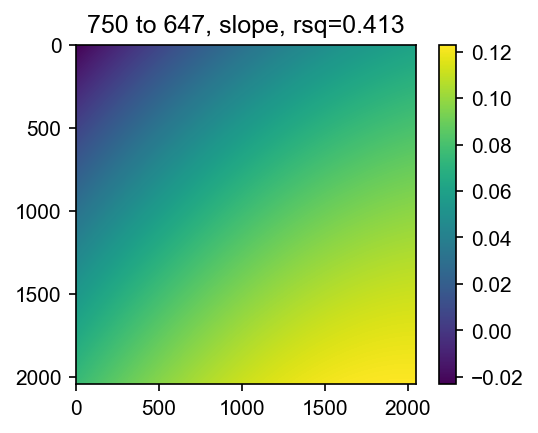

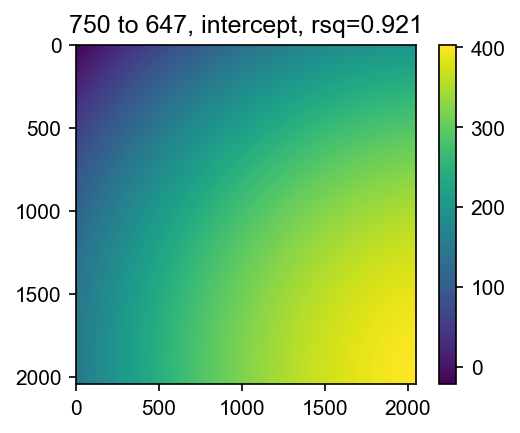

-- not enough spots (14) from 750 to 561
-- not enough spots (7) from 647 to 750
- check 255 bleedthrough pairs.
- start iteration with outlier_sigma=2.00, keep_percentage=0.95
-- iter: 1, kept in this round: 0.914, total: 0.914
-- iter: 2, kept in this round: 0.876, total: 0.800
-- iter: 3, kept in this round: 0.941, total: 0.753
-- iter: 4, kept in this round: 0.911, total: 0.686
-- iter: 5, kept in this round: 0.897, total: 0.616
-- iter: 6, kept in this round: 0.936, total: 0.576
-- iter: 7, kept in this round: 0.918, total: 0.529
-- iter: 8, kept in this round: 0.889, total: 0.471
-- iter: 9, kept in this round: 0.867, total: 0.408
-- iter: 10, kept in this round: 0.952, total: 0.388
- 99 pairs passed.
-- 99 spots are used to generate profiles from 647 to 561
[ 8.02964735e-02  1.48080435e-03 -1.58068322e-06 -2.77305376e-06
 -5.87335032e-05 -1.14208283e-07  3.10675666e-08  1.30408274e-09
  1.06751676e-09  5.24179916e-10] 0.08737431182417055
[ 2.34035277e+02  1.85390460e+00  1.90913

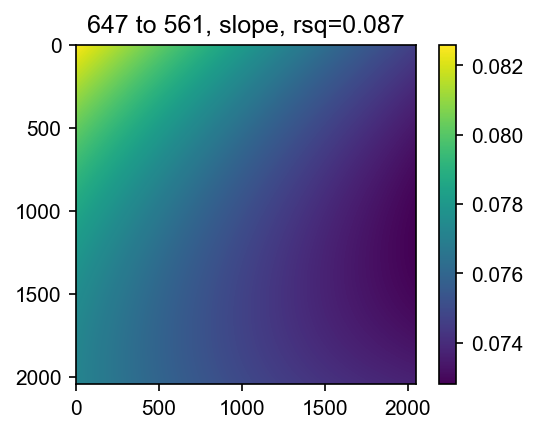

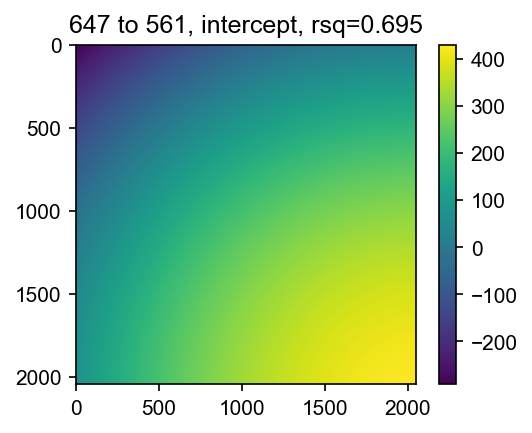

-- not enough spots (2) from 561 to 750
-- not enough spots (21) from 561 to 647
-- saving to file:\\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\Corrections_3color\bleedthrough_correction_750_647_561_2048_2048.npy


In [25]:
%matplotlib inline
reload(correction_tools.bleedthrough)
bleed_pf = correction_tools.bleedthrough.Generate_bleedthrough_correction(
            folders[1:4], rsq_th=0.8,
            corr_channels=bleedthrough_channels,
            correction_args=bleedthrough_correction_args,
            fitting_args=bleedthrough_fitting_args,
            num_images=num_images, num_threads=num_threads,
            save_folder=correction_folder,
            overwrite_profile=True,
            overwrite_temp=False,
            )

### Check bleedthorugh for cy7

In [8]:
from ImageAnalysis3.io_tools.load import correct_fov_image
from ImageAnalysis3.io_tools.crop import crop_neighboring_area

In [27]:
reload(ia.io_tools.load)
cy7_filename = os.path.join(folders[1], fovs[3])

cy7_raw_ims, = ia.io_tools.load.correct_fov_image(cy7_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy7_corr_ims, = ia.io_tools.load.correct_fov_image(cy7_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, bleed_profile=bleed_pf,
                                                   chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\H1R1\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\H1R1\Conv_zscan_03.dax  in 2.393s
-- removing hot pixels for channels:['750', '647', '561'] in 33.184s
-- illumination correction for channels: 750, 647, 561, in 6.469s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 43.775s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\H1R1\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading image

<IPython.core.display.Javascript object>


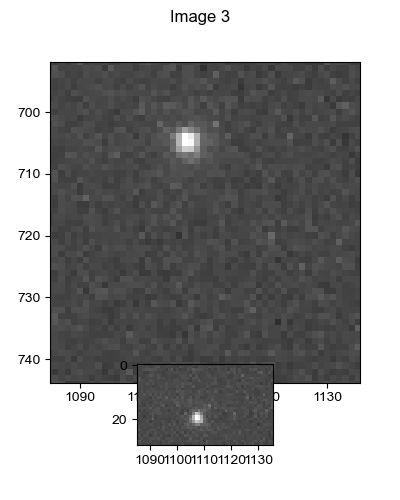

In [28]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy7_raw_ims[0], cy7_corr_ims[0], cy7_raw_ims[1], cy7_corr_ims[1]])

## Check bleedthrough for cy5

In [31]:
reload(ia.io_tools.load)
cy5_filename = os.path.join(folders[2], fovs[3])

cy5_raw_ims, = ia.io_tools.load.correct_fov_image(cy5_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy5_corr_ims, = ia.io_tools.load.correct_fov_image(cy5_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\H2R2\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\H2R2\Conv_zscan_03.dax  in 16.999s
-- removing hot pixels for channels:['750', '647', '561'] in 35.987s
-- illumination correction for channels: 750, 647, 561, in 6.996s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 61.785s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20200803-IMR90_SI16-5kb_colorswap\H2R2\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading blee

<IPython.core.display.Javascript object>


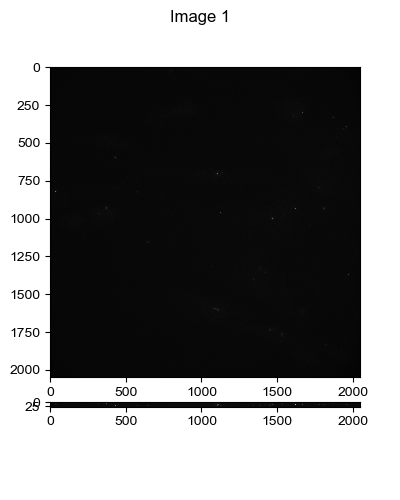

In [32]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy5_raw_ims[1], cy5_corr_ims[1], cy5_raw_ims[2], cy5_corr_ims[2]])

## Check bleedthrough for cy3

In [97]:
reload(ia.io_tools.load)
cy3_filename = os.path.join(folders[2], fovs[3])

cy3_raw_ims, = ia.io_tools.load.correct_fov_image(cy3_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy3_corr_ims, = ia.io_tools.load.correct_fov_image(cy3_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\169.254.229.228\Chromatin_NAS_3\20191007_CTP07_chr2\H4R4_Cy5\Conv_zscan_02.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\169.254.229.228\Chromatin_NAS_3\20191007_CTP07_chr2\H4R4_Cy5\Conv_zscan_02.dax  in 3.602s
-- removing hot pixels for channels:['750', '647', '561'] in 35.113s
-- illumination correction for channels: 750, 647, 561, in 7.695s
- correct the whole fov for image: \\169.254.229.228\Chromatin_NAS_3\20191007_CTP07_chr2\H4R4_Cy5\Conv_zscan_02.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_561_2048x2048.npy
-- loading imag

<IPython.core.display.Javascript object>


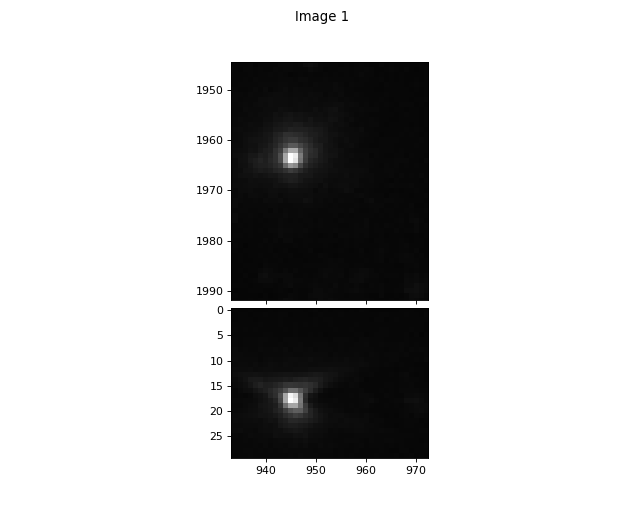

In [99]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy3_raw_ims[0], cy3_raw_ims[1], cy3_corr_ims[1], cy3_corr_ims[0]])